# 전국 신규 민간 아파트 분양가격 분석
* 박조은님의 유튜브 명강의와 Github 참조함
    * Youtube(오늘코드) [Link](https://www.youtube.com/watch?v=H6-Y-sipgCk&list=PLaTc2c6yEwmpoDDdE9C1p0xfQXz6eEzmH&index=2&t=26s)
    * Github(corazzon) [Link](https://github.com/corazzon/OpenDataWrangling)
* 데이터 : 공공데이터 포털 [Data Link](https://www.data.go.kr/dataset/3035522/fileData.do)

## 데이터
* 주택도시보증공사_전국 평균 분양가격(2020년 2월)
* 2015년 10월부터 2020년 2월까지의 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re

import missingno as msno

%matplotlib inline
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 

In [5]:
pre_sale = pd.read_csv('data/apt_price/주택도시보증공사_전국 평균 분양가격(2020년 2월).csv', 
                       encoding='euc-kr', engine='python')
pre_sale.shape

(4505, 5)

In [6]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


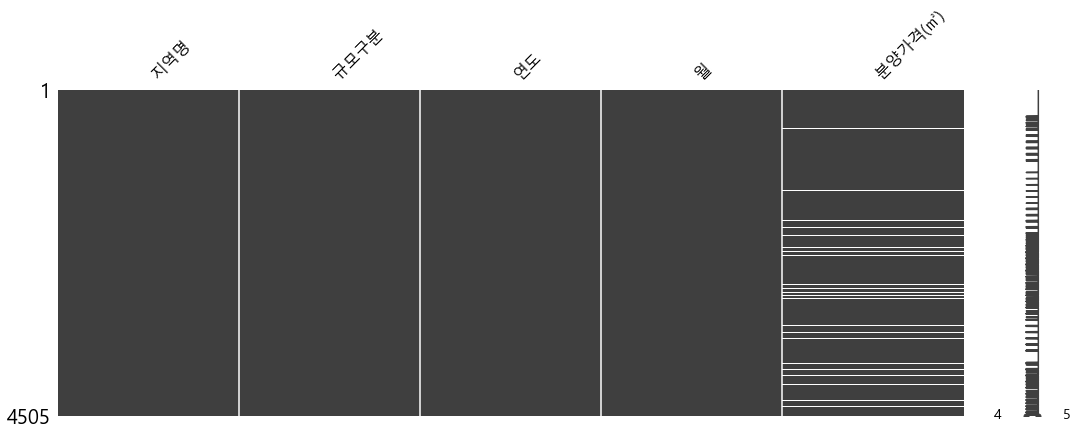

In [7]:
# 결측치 확인
msno.matrix(pre_sale, figsize=(18,6))

In [9]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [10]:
# 연도와 월은 Category형 데이터이므로 str로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [11]:
pre_sale_price = pre_sale['분양가격(㎡)']
pre_sale_price.head()

0    5841
1    5652
2    5882
3    5721
4    5879
Name: 분양가격(㎡), dtype: object

In [12]:
# 분양가격을 평당분양가격으로 변경(타입을 숫자로 변경 후 미터제곱을 평으로 환산)
pre_sale['평당분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce') * 3.3
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,19400.7


In [13]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
평당분양가격     float64
dtype: object

In [14]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 6 columns):
지역명        4505 non-null object
규모구분       4505 non-null object
연도         4505 non-null object
월          4505 non-null object
분양가격(㎡)    4210 non-null object
평당분양가격     4109 non-null float64
dtypes: float64(1), object(5)
memory usage: 211.2+ KB


In [15]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    295
평당분양가격     396
dtype: int64

In [16]:
pre_sale.describe()

,평당분양가격
count,4109.000000
mean,10761.001241
std,4256.120381
min,6164.400000
25%,8094.900000
50%,9527.100000
75%,11860.200000
max,45655.500000


In [17]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,4505,4505,4505,4505,4210
unique,17,5,6,12,1795
top,전북,전용면적 85㎡초과 102㎡이하,2017,2,2221
freq,265,901,1020,425,17


In [19]:
# 2019년 데이터만 확인
pre_sale_2019 = pre_sale[pre_sale['연도'] == '2019']
print(pre_sale_2019.shape)
pre_sale_2019.head()

(1020, 6)


,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
3315,서울,전체,2019,1,7600,25080.0
3316,서울,전용면적 60㎡이하,2019,1,7400,24420.0
3317,서울,전용면적 60㎡초과 85㎡이하,2019,1,8105,26746.5
3318,서울,전용면적 85㎡초과 102㎡이하,2019,1,6842,22578.6
3319,서울,전용면적 102㎡초과,2019,1,7787,25697.1


In [20]:
pre_sale['규모구분'].value_counts()

전용면적 85㎡초과 102㎡이하    901
전체                   901
전용면적 60㎡초과 85㎡이하     901
전용면적 60㎡이하           901
전용면적 102㎡초과          901
Name: 규모구분, dtype: int64

In [21]:
pre_sale['지역명'].value_counts()

전북    265
경북    265
충북    265
제주    265
울산    265
전남    265
광주    265
강원    265
대전    265
서울    265
경남    265
세종    265
경기    265
충남    265
부산    265
인천    265
대구    265
Name: 지역명, dtype: int64